In [4]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import joblib




In [5]:
params = joblib.load("../models/flood_distance_model.pkl")

mean_flood = params["mean_flood"]
mean_nonflood = params["mean_nonflood"]

print("Distance-based model loaded")


Distance-based model loaded


In [6]:
def predict_single_image(image_path, mean_flood, mean_nonflood):
    with rasterio.open(image_path) as src:
        img = src.read(1)

    X = img.reshape(-1, 1)

    dist_flood = np.linalg.norm(X - mean_flood, axis=1)
    dist_nonflood = np.linalg.norm(X - mean_nonflood, axis=1)

    preds = (dist_flood < dist_nonflood).astype(np.uint8)

    flood_ratio = preds.mean()

    return flood_ratio, img, preds.reshape(img.shape)



Flood probability (non-flood): 0.014309995448529424


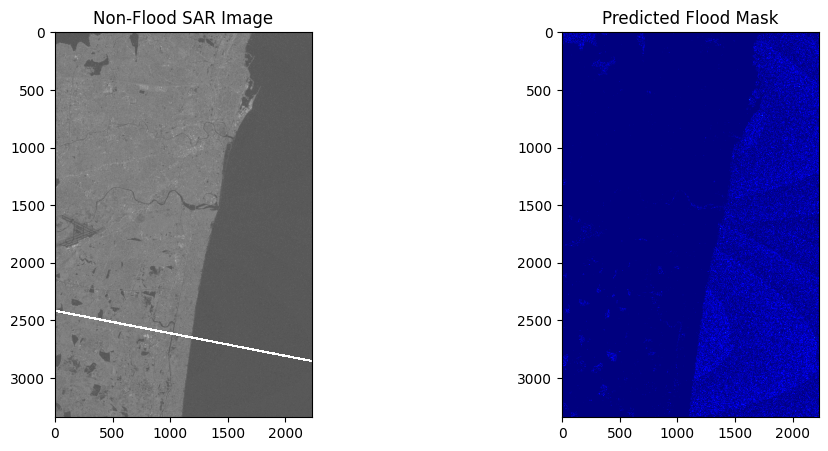

In [7]:
ratio, img, mask = predict_single_image(
    "../data/non_flood_pic.tif",
    mean_flood,
    mean_nonflood
)

print("Flood probability (non-flood):", ratio)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Non-Flood SAR Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap="jet")
plt.title("Predicted Flood Mask")

plt.show()


Flood probability (moderate flood): 0.20778430435850326


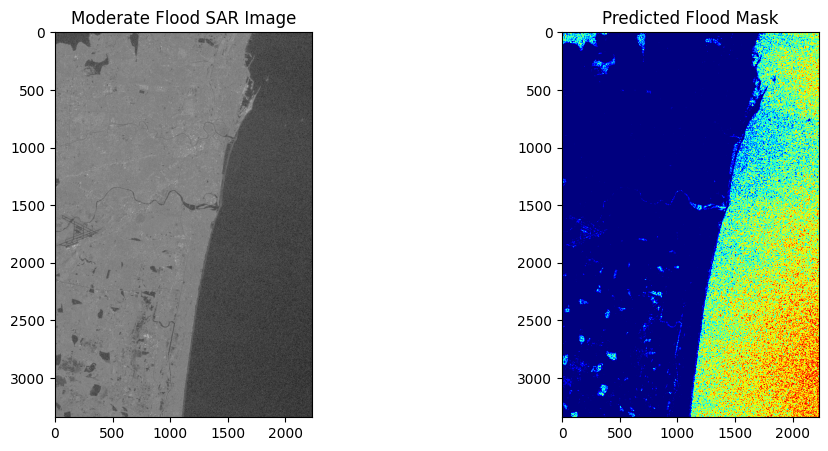

In [8]:
ratio, img, mask = predict_single_image(
    "../data/moderate_flood_pic.tif",
    mean_flood,
    mean_nonflood
)

print("Flood probability (moderate flood):", ratio)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Moderate Flood SAR Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap="jet")
plt.title("Predicted Flood Mask")

plt.show()


Flood probability (severe flood): 4.030227783100664e-07


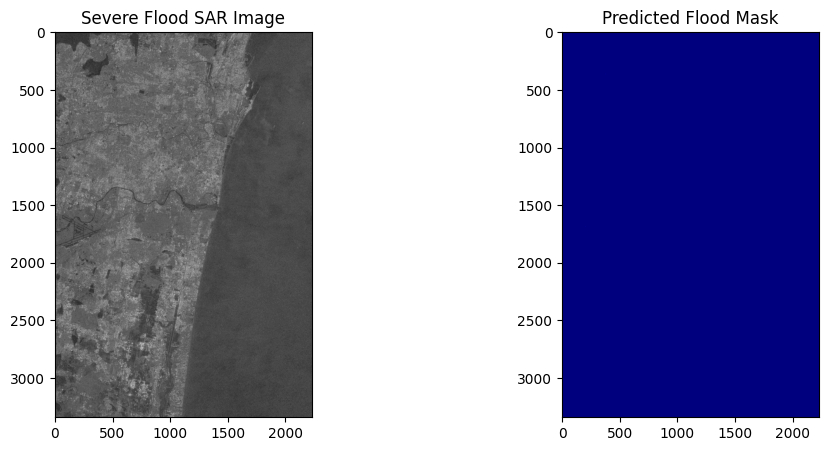

In [9]:
ratio, img, mask = predict_single_image(
    "../data/severe_flood_pic.tif",
    mean_flood,
    mean_nonflood
)

print("Flood probability (severe flood):", ratio)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Severe Flood SAR Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap="jet")
plt.title("Predicted Flood Mask")

plt.show()

